## Bias Variance Tradeoff

Steve Pittard wsp@emory.edu (citations to sources are inline) 

There are few topics in Machine Learning that get more attention than the Bias Vs Variance topic because it is very important to understand. Knowing the basics will help guide the intelligence creation of models and help set expectations accordingly. Lots of people blindly create models only to find that they don't generalize well to new data and wonder why. While we can work with the data in terms of cross validation and feature engineering, unless the data has been cleaned and processed accordingly then even the training model might not experience good performance. 

## The Hidden Distribution

Think of any dataset as emerging from a distribution that conforms to some known behavior - like a multi-variable function. In such a case, we can then make lots of assumptions about the data we have since we know how it was generated. But that is rarely the case even in simple datasets with only a handful of features. What we are trying to do when making a model is estimate that "unknowable" function using whatever data we have at hand in that moment. In effect what we have is a sample of a large population which we hope can be used to better understand that larger pool of information. 

## The Noise

So much of data we get has measured information which has been generated or recorded imperfectly. Think of a public health facility which serves the interest of a large community. There can be wide variance in, for example, how workers in a public health center take vital information. This could be due to:

  - Fatigue due to over work
  - Non-existent or inconsistent training
  - Non-compliant patients
  - [Faulty equipment](http://www.healthcarebusinesstech.com/testing-hospital-equipment/)
  - Transcription errors when logging or updating results

<hr>

<img src="pics/fequip.png" width ="800" height=800>

<hr>

However, someone wanting to do analysis on this information will still want this data because it's probably the best that anyone is going to get. Especially if you want to do some analysis on a public health issue impacting the entire community including those without medical insurance. 

The point here is that what we get in terms of data almost always contains "noise" in it that we might not be able to detect at least immedidately or perhaps ever. The problem with uncalibrated or faulty equipment alone can cause lots of problems. Worse, once people become aware of the problem they might not have the funds to address the problem so any measurements coming from the equipment still get used until a replacement is found at which point the subsequent data can start look a lot different even relative to the same patients and processes as before. Unless this is noted then downstream analysis will be more difficult. 

### Nobody Tells Me Anything 

But analysts will still happily use this information to feed the creation of models which can unintentionally learn the noise along with the "good stuff" commonly known as the "signal". The challenge then becomes to distinguish between the signal and the noise when and wherever possible. 

It's one thing if you know about the problems with equipment but many times you do not which can make life difficult especially if you have data coming from both the older faulty equipment and the newer equipment that operates within expected specifications. This is what makes life very hard for Data Scientists and Analysts who have to somehow tease all of this out many times without being told. Getting "dirty data" is more common than not and it is rare that you get information as you would like it. 

### Graphic Example of Signal Plus The Noise

At a physical level, the following plots serve as an example on what happens when noise is combined with what would otherwise be a very clear signal. In the upper plot we have a line of the y=x variety which is quite clear. The second plot appears to be some randmon noise with no discernable pattern but if we add this data to the first plot then we get the final plot. Check it out. 

You will see that it has charactestics of the upper two plots with a decidedly upward slope whose devaitions from the line reflect the patterns in the noise. So if presented with this information not knowing how it was constructed, you might not know at first what is the signal and what is the noise. And this is just a simple example. Imagine what it would look like with more complicated data involving multiple variabes or features ! 

<img src="pics/sigandnoise.png" width ="600" height=600>

Another view of this process can be observed as follows. The data we get comes from an unknown function of process and we don't know the identity of f(x) or even if there is a true f(x). It's more likely this it comes from some distribution and if it's one of the known ones (e.g. Normal, Poisson, Chi-Square, etc) then maybe we don't need to build a model. After all, if we know how the data was generated and can account for any noise then we can estimate the important parameters and be on our way. But life is not that easy.

<img src="pics/fox.png" width ="600" height=600>

In real life, what we wind up doing is creating an approximation of f(x) by implementing a method. So we work with the model as a proxy for the actual function which is usually the best you can hope for. What we would like to do is decompose any error we get in terms of Bias and Variance which the allows us to quantify these entities. 



## Prediction vs Inference

Sometimes we want to know if there is a relationship between the predictor variables and the outcome. $x_i$ and Y. Being able to estimate Y is a goal but we might not really be interested in generalizing it to new data sets or additional observations to an existing data set. Additionally, if we think of all the $x_i$ values as input variables into a function **f** then we might want to know what that function looks like because if we understand it well enough we can then use it investigate relationships between x_i and Y AND how useful it might be to apply the function **f** to new data.

The [Introduction To Statistical Learning](https://hastie.su.domains/ISLR2/ISLRv2_website.pdf) (p. 19) has the following to say about Inference

1) Which predictors are associated with the response? 

It is often the case that only a small fraction of the available predictors 
are substantially associated with Y . Identifying the few important predictors 
among a large set of possible variables can be extremely useful, depending on
the application.

2) What is the relationship between the response and each predictor?

Some predictors may have a positive relationship with Y , in the sense
that larger values of the predictor are associated with larger values of
Y. Other predictors may have the opposite relationship. Depending
on the complexity of f , the relationship between the response and a
given predictor may also depend on the values of the other predictors.

3) Can the relationship between Y and each predictor be adequately sum-
marized using a linear equation, or is the relationship more complicated? 

Historically, most methods for estimating f have taken a linear
form. In some situations, such an assumption is reasonable or even de-
sirable. But often the true relationship is more complicated, in which
case a linear model may not provide an accurate representation of
the relationship between the input and output variables.

### Flexibility, Accuracy and Interpretability

As we move into understanding how to build models it is important to consider the various methods in terms of their interpretatiblity and flexibility as it relates to accuracy. We might also wish to consider how parametic methods differ from non-parametric methods and what the relative advantages are of both. But first let's deal with the issue of flexible vs non-flexibile methods.

One is tempted to attach a value judgement to the terms which would lead us to favor "flexible" methods although that would not be correct. Let's start with in or non flexible methods to see what they offer. Well to start they allow us to estimate the function **f** using an approach that might not even generate a result that hints at the true nature of **f**. This is accomplished by generating / computing paramters that then allow us to estimate the output of **f**. In the case of linear regression we are generating a buch of beta coefficients. 

$$ f = \beta_{0} + \beta_{1} x_{i1} + \cdots + \beta_{p} x_{ip} + \varepsilon_i $$

With parametric methods we make an assumption about the form of the estimator ( a line, polynomial, etc). this reduces the estimation problem down to estimating parameters.  So we have something like above. This makes our work easier because we understand lines better than unwieldy higher dimensional functions. We train the model to identify appopotate betas - using something like least squares method. 

This is nice because we have reduced the problem to something more simple even though it might not give us any insight into the true nature of the **f** function. Now some methods might allow us to perform the regression using a method other than least squares which is a common default. This would add flexibility but if we use a different method to the regression it might involve a more complex set of parameters and we could start to lose interpretability. This isn't bad though if maybe we get more accuracy. 

Consider a neural net - it has parameters which are learned as a result of the training process and is thus a parametric method although its result might not give us much inormation about how the features interact. Thus for inference we might not have much to offer. 

Non parametric methods do not assume much if anything about the functional form of F. Decision tree are like this. The method seeks to get close to the output of f to get close to data without being too "wiggly" or specific to the data. Let's look at some graphs to simpliy things



<img src="pics/flex1.png" width ="500" height=500>

<img src="pics/flex2.png" width ="500" height=500>

<img src="pics/flex3.png" width ="500" height=500>

<img src="pics/flex4.png" width ="500" height=500>




###  Bias and Variance

Think of this as the degree to which a model conforms to the data. For example, a low-bias model will "follow" the training data closely perhaps at the expense of reasonable applicability to unseen data. Such a model might also be significantly different if trained on a different data set which calls into question its ability to recognize the signal from the noise. 

This means that a low bias model will exhibit a higher degree of variability because of this behavior. The lower the bias, the greater the potential variability. A low bias model runs the risk of being **over fit** to the data. We might also see the model being increasingly complex because of assumptions being made or because the method is "paying attention" to lots of features in the training data when it perhaps does not need to.

A higher bias model, however, will exhibit less variability when applied to new data because assumptions have been made before making the model. It's also possible, if not guaranteed, that the model will exhibit lower variability when applied to new data. After all, the model isn't going to change that much should it encounter new training data. 

There is always a tradeoff between the two as indicated in the following figure. We might say that a higher bias model **under fits** the data. It's also generally true that a high bias model might be more simple.

<img src="pics/bias_vs_var.png">


If you notice, we can express, at a given point, say X0, the error in terms of the Bias of a Model and the Variance. More specifically, we could look at the error in terms of Mean Squared Error to give it some specificity. We then have formulae of the type:

<img src="pics/bias_var_formulae.png">

where

<img src="pics/formu_exp.png">

We can't do much with the irreducible error but we can work with the Bias and Variance to hopefully get a good model that balances these two. 

## Simple Is Good

So how does this relate to Machine Learning ? Well, first of all, you need to understand that cleaning data is a big part of the job but for now we'll gloss over that in the interest of showing the effect of noisy data when using various methods. Let's assume for the moment you have what you believe to be decent enough data to start with building a model. Would you start with a Convolutional Neural Net method just because it is the hot and new thing ? You might but what happens when someone starts asking lots of questions about it. 

When trying to understand a situation or resolve a problem, it is best to adopt approaches that are easy to defend. This does not mean you should avoid complexity particularly if it provides some gain in performance just that in Machine Learning it is best to stick with something you can discuss should someone challenge you on it. This is frequently the case with scientific publications wherein a peer review comment might point out some incorrect assumption or ambiguous result that requires clarification. 

If you have used, for example, a Neural Net model then you had better be up to date on your knowledge thereof and be in a position to discuss details. This is why many times it's best to start with a tried and true method such as Logistic Regression (in the case of Classification problems) or a Decision Tree which is amazing tolerant to unscaled data and mixed variable types. These methods are supported with a wide body of literature so if challenged, then you could more esily defend your work.

## Quiz Time 

Pop quiz time. Which of these models is the best ?

<img src="pics/some_mod.png" width ="600" height=600>

It's reasonable to ask by what metric would we be judging this model. Of course, for regression problems we use things like Mean Absolute Error, Mean Squared Error, or Root Mean Squared Error. In any case, which model is "closer" to the points ? Which model might be more portable to other data sets that might be similar (or not) to that depicted in the graph ? 

### An Example

Let's dig a little deeper here and get our hands dirty with an exmaple. Let's define a function that sqaures its input. This is a parabola type function y = x^2. Nothing complicated about that. In this case, this is our "Hidden Distribution" from which our data emanates. In real life we rarely if ever know what this distribution is. 

1. Define the function y=x^2 (The Signal function / "hidden distribution")
2. Feed the Signal Function with information from a uniform distribution 
3. Create a 2-column Data Frame with this information:
      - x is the data returned from the uniform function 
      - y is the output of x after being processed by the Signal function plus 
        some random noise added from a normal distribution
4. Pick three methods to model the relationship between y and x
5. Make predictions using the data and plot the results for each method

In [2]:
# Derived from https://daviddalpiaz.github.io/r4sl/simulating-the-biasvariance-tradeoff.html
# He used R and I converted the code to Python

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Set up a function that represents a population
def f(x):
    return(x**2)

print(f(4))

16


In [3]:
def get_sim_data(f,sample_size=100):
    from numpy.random import uniform, normal
    import pandas as pd
    
    x = uniform(0,1,sample_size)
    y = f(x) + normal(0,0.3,sample_size)
    sim = pd.DataFrame({'x':x,'y':y})
    return(sim)

# Generate some simulated data
sim_data = get_sim_data(f,100)

sim_data.head()

,x,y
0,0.642507,0.218472
1,0.230146,-0.151286
2,0.054942,-0.144638
3,0.483948,-0.341657
4,0.131685,0.110397


In [4]:
# Get the X and y from the sim data
sim_vals = sim_data.values
X = sim_vals[:,0]
y = sim_vals[:,1]

# Fit a Linear Model
lmreg = LinearRegression()
lmreg.fit(X.reshape(-1,1),y)

# Fit a Dummy Model 
dreg = DummyRegressor(strategy="mean")
dreg.fit(X,y)

# Fit a Decision Tree
dtree = DecisionTreeRegressor()
dtree.fit(X.reshape(-1,1),y)

# Setup a common X grid for all models
grid = np.arange(0,1,.01)

# Now make predictions using the grid values
grid_lm_preds    = lmreg.predict(grid.reshape(-1,1))
grid_dum_preds   = dreg.predict(grid)
grid_dtree_preds = dtree.predict(grid.reshape(-1,1))

Lets plot the preds

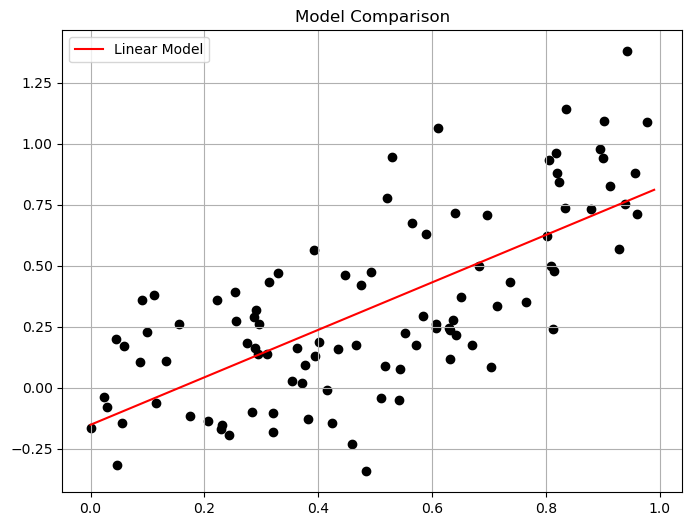

In [5]:
# Plot these predictions
plt.figure(figsize=(8,6))
plt.plot(grid,grid_lm_preds,'red') 
plt.legend(['Linear Model'])
plt.scatter(X,y,c="black")
plt.title("Model Comparison")
#plt.plot(x0,f(x0),'rX',markersize=24,c="black")
plt.grid()

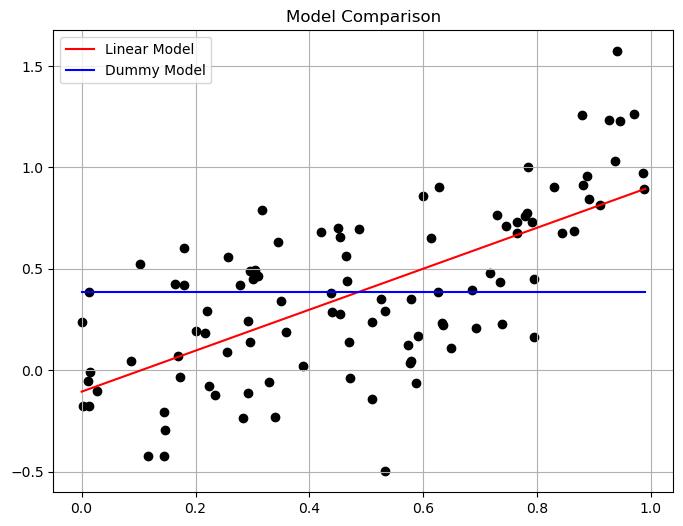

In [5]:
# Plot these predictions
plt.figure(figsize=(8,6))
plt.plot(grid,grid_lm_preds,'red') 
plt.plot(grid,grid_dum_preds,'b')
plt.scatter(X,y,c="black")
plt.legend(['Linear Model','Dummy Model'])
plt.title("Model Comparison")
#plt.plot(x0,f(x0),'rX',markersize=24,c="black")
plt.grid()

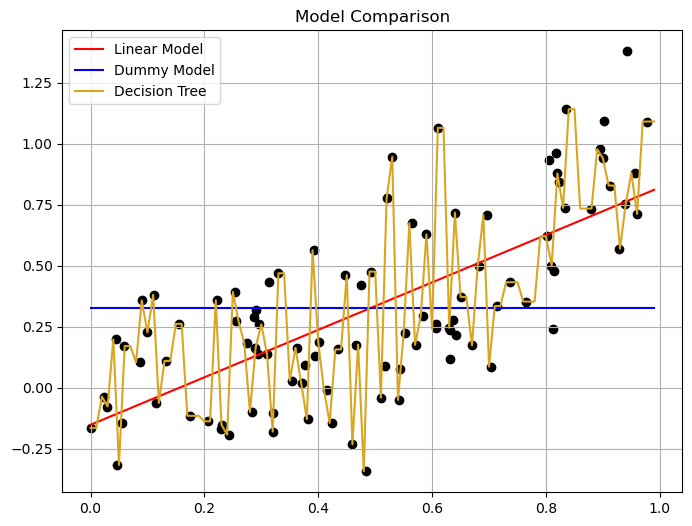

In [6]:
# Plot these predictions
plt.figure(figsize=(8,6))
plt.plot(grid,grid_lm_preds,'red') 
plt.plot(grid,grid_dum_preds,'b')
plt.plot(grid,grid_dtree_preds,'goldenrod')
plt.scatter(X,y,c="black")
plt.legend(['Linear Model','Dummy Model','Decision Tree'])
plt.title("Model Comparison")
#plt.plot(x0,f(x0),'rX',markersize=24,c="black")
plt.grid()

We will now use simulation to estimate the bias, variance, and mean squared error for the estimates for  f(x) given the dummy and dection tree models at the point x0=0.95. We use simulation to complete this task, as performing the exact calculations are always difficult, and often impossible. So picking up after the above steps we will do:

6. Generate a number (n_sims=200, for example) of simulated data sets as above
7. Fit each of the data sets from number 6 using the same three methods as above
8. Make predictions using the three methods
9. Plot the predictions to see how they vary with each simulation 

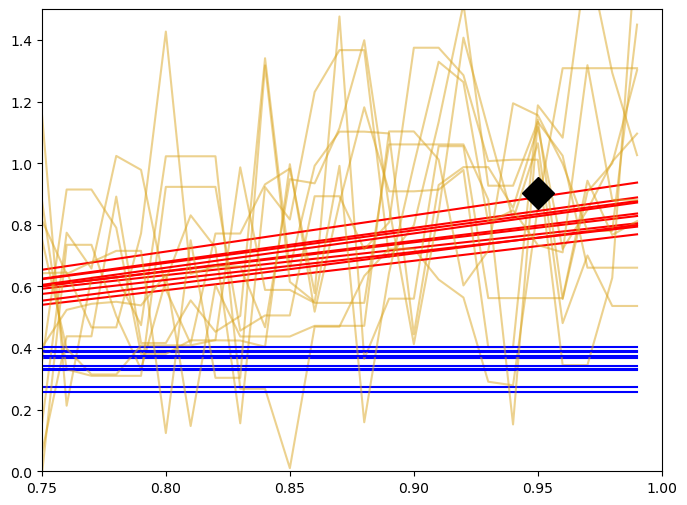

In [7]:
# Setup the number of simulations and the number of models
# We will be evaluating bias, rmse, and variance at a specific point x0 = 0.95
n_sims = 10
n_models = 3
x0 = 0.95

# Setup an array of zeroes to receive the predictions made 
# during the simulation
predictions = np.zeros((n_sims,n_models))

# Plot a blank slate to contain the results of the
# simulation

plt.figure(figsize=(8,6))
plt.xlim(0.75, 1)
plt.ylim(0,1.5)
plt.plot(X,y,c="white")    

# for each loop, generate a new data set
for i in range(n_sims):
    
    # generate a new dataset
    sim_data = get_sim_data(f, sample_size = 100)
    
    # Extract the X and y vals
    sim_vals = sim_data.values
    X = sim_vals[:,0]
    y = sim_vals[:,1]
    
    # fit the decision tree
    fit_1 = dtree.fit(X.reshape(-1,1),y)
    fit_1_preds = fit_1.predict(grid.reshape(-1,1))
    plt.plot(grid,fit_1_preds,c='goldenrod',alpha=0.5)
    
    # fit the dummy model
    fit_2 = dreg.fit(X,y)
    fit_2_preds = fit_2.predict(grid)
    plt.plot(grid,fit_2_preds,c='blue')
    
    # fit the regression model
    fit_3 = lmreg.fit(X.reshape(-1,1),y)
    fit_3_preds = fit_3.predict(grid.reshape(-1,1))
    plt.plot(grid,fit_3_preds,c='red')
    
    # Stash the point prediction into the predictions matrix
    predictions[i,0] = fit_1.predict(np.array(.95).reshape(1,-1))
    predictions[i,1] = fit_2.predict(np.array(.95).reshape(1,-1))
    predictions[i,2] = fit_3.predict(np.array(.95).reshape(1,-1))

# Plot the x0 on the graph
plt.plot(x0,f(x0),'D-',markersize=16,c="black")
#plt.plot(x0,f(x0),markersize=16,c="black")


To evaluate the bias and variance in a specific case, we simulate values for the response y at x0 = 0.95 according to the true model which we know. (After all, we created it). We'll add in some random noise on the output coming from y=x^2 which is what generally happens in real life.  We'll also define some basic functions to compute the Bias and Root Mean Squared erro. 

In [8]:
# Here were simulate some noise that is part of the error
eps = np.random.normal(0,.3,n_sims)
y0 = f(x0) + eps
y0[0:5]

array([0.7191113 , 0.77260351, 0.9030906 , 1.11666011, 0.87407749])

In [9]:
# Define some functions to get the bias and MSE
def get_bias(estimate, truth):
    import numpy as np
    return((np.mean(estimate)-truth)**2)

def get_mse(estimate, truth):
    return(np.mean((estimate-truth)**2))


In [10]:
# Apply the above functions to each column of the predictions matrix
bias = [ get_bias(predictions[:,i],f(x0))  for i in range(predictions.shape[1])]
mse  = [ get_mse(predictions[:,i],y0)  for i in range(predictions.shape[1])]

# Get the variance - np has such a function already
variance = [ np.var(predictions[:,i]) for i in range(predictions.shape[1])]

# Create a data frame so we can compare the Bias, MSE, and Variance across models
final = pd.DataFrame((bias,mse,variance),columns=["decison_tree","dummy","regression"])
final.index = ['bias','mse','variance']

In [11]:
# Multiply by 100 to scale up the numbers for better comparison
final.T * 100

,bias,mse,variance
decison_tree,0.893310,9.641115,3.978238
dummy,31.005445,45.428765,0.216213
regression,1.042667,6.684731,0.214179


A number of things to notice here as indicated (https://daviddalpiaz.github.io/r4sl/simulating-the-biasvariance-tradeoff.html)

1) We use squared bias in this table. Since bias can be positive or negative, squared bias is more useful for observing the trend as complexity increases.

2) The squared bias trend which we see here is decreasing bias as complexity increases, which we expect to see in general.

3) The exact opposite is true of variance. As model complexity increases, variance increases.

4) The root mean squared error, which is a function of the bias and variance, is a result of the bias-variance tradeoff. We can decrease bias, by increasing variance. Or, we can decrease variance by increasing bias. By striking the correct balance, we can find a good mean squared error.


## Python Package

Normally, we don't spend a lot of time calculating bias and variance choosing rather to focus on performance measures which, in the case of MSE or RMSE, are a function of bias and variance. So one is never far away from the concept. However, there is a Python function called **mlxtend** to do this for you. 

In [12]:
from mlxtend.evaluate import bias_variance_decomp
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# Read in some data
url = "https://raw.githubusercontent.com/steviep42/bios_534/master/data/mtcars.csv"
mtcars = pd.read_csv(url)

mtvals = mtcars.values

y = mtvals[:,0]         # Gets the mpg column
X = mtvals[:,1:10]      # Gets everything BUT the mpg column

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# define the model
model = LinearRegression()

# estimate bias and variance
mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 51.513
Bias: 17.664
Variance: 33.849


## One More Example

Many times people get carried away with wanting to build the perfect model. They have at their disposal some data on which to train so they put everything into making any resulting model match the data as well as they can. Here is an example. Relative to the mtcars data frame, let's plot MPG vs Weight and then try to fit some lines through the data. 

I'll use this opportunity to show you how easy it is to get carried away with trying to match the data. 

When we build the following models, we'll use something called polynomial regression which allows us to better "follow" the data (and perhaps the noise) by requesting polynomials of degrees 0, 1, ... n. We'll then judge the quality of any model we build by using the RMSE which we defined above:

$$ RMSE = \sqrt\frac{\sum_i^n(P_i-O_i)^2}{n} $$

We'll also be using polynomial regression in this section. This is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x. So instead of the following:

$$ y = \beta_0 + \beta_1 x + \varepsilon $$

we would have the following:

$$ y = \beta_0 + \beta_1x + \beta_2 x^2 + \varepsilon $$

It's pretty easy to do this in Python. Most of the code below is for plotting the results. The call to the **poly1d** function to do the polynomial fitting is easy.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

url = "https://raw.githubusercontent.com/steviep42/bios_534/master/data/mtcars.csv"
mtcars = pd.read_csv(url)
mtcars.head(8)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2


So the data is pretty straightforward here. We want to use the Weight variable, **wt**, to predict the Miles Per Gallon variable, **mpg**. 

Text(0, 0.5, 'Miles Per Gallon')

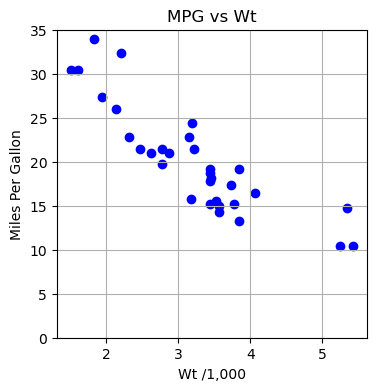

In [14]:
y = mtcars.mpg
X = mtcars.wt

plt.figure(figsize=(4,4))
plt.scatter(X,y,c="blue")
plt.ylim(0,35)
plt.title("MPG vs Wt")
plt.grid()
plt.xlabel("Wt /1,000")
plt.ylabel("Miles Per Gallon")

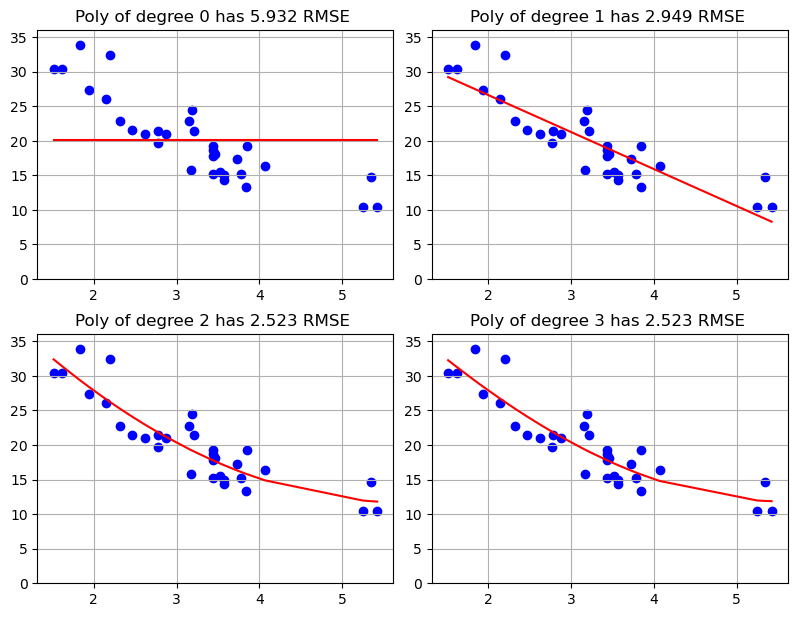

In [37]:
y = mtcars.mpg
X = mtcars.wt

rmse = []

# Plot the MPG vs Wt and then fit some polynomial regressors
# through the data 

plt.figure(figsize=(8,9))
for ii in range(0,4):
    p1d = np.poly1d(np.polyfit(X, y, ii))
    #plt.scatter(X,y,c="blue")
    
    xp = X.copy()     # Get a copy since we need the original
    xp.values.sort()
    rmse.append(round(mean_squared_error(y,p1d(X))**0.5,3))
    
    ax = plt.subplot(3,2,ii+1)
    ax.scatter(X,y,c="blue")
    ax.plot(xp,p1d(xp),c="red")
    ax.grid()
    ax.set_ylim((0,36))
    ax.set_title(f'Poly of degree %s has %s RMSE '% (ii,rmse[-1]))

plt.tight_layout(h_pad=.8,pad=.8)
 

So now we'll build a number of these from degree 0 to 10

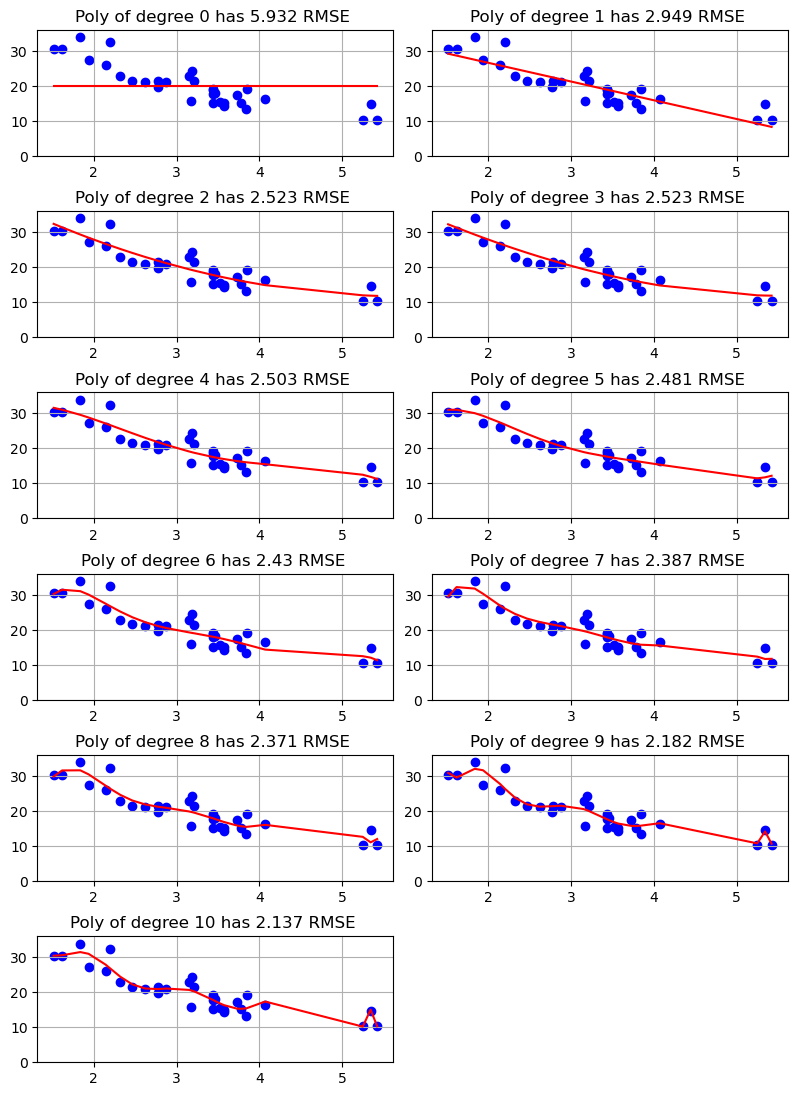

In [15]:
rmse = []

plt.figure(figsize=(8,18))
for ii in range(0,11):
    p1d = np.poly1d(np.polyfit(X, y, ii))
    #plt.scatter(X,y,c="blue")
    
    xp = X.copy()
    xp.values.sort()
    rmse.append(round(mean_squared_error(y,p1d(X))**0.5,3))
    
    ax = plt.subplot(10,2,ii+1)
    plt.scatter(X,y,c="blue")
    ax.plot(xp,p1d(xp),c="red")
    ax.grid()
    ax.set_ylim((0,36))
    ax.set_title(f'Poly of degree %s has %s RMSE '% (ii,rmse[-1]))


plt.tight_layout(h_pad=.8,pad=.8)

Now we'll build some using Training data which is a subset of the total data frame. We'll also carve out a testing data frame and keep track of the training and testing RMSE error. 

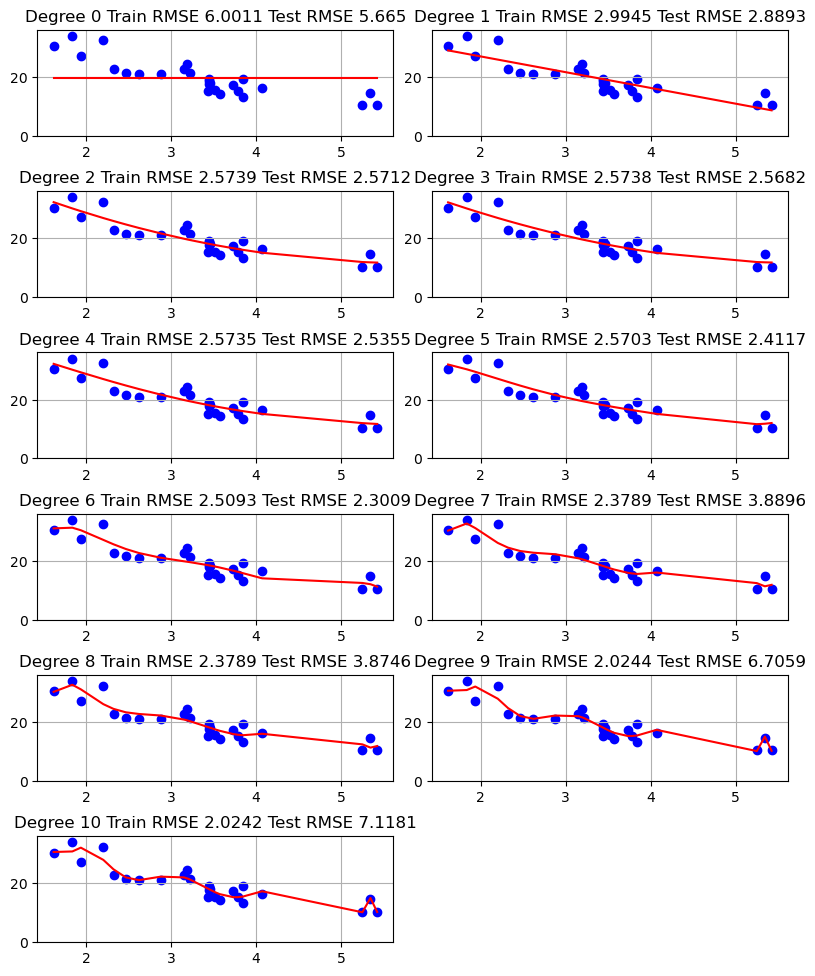

In [16]:
# Create a Train / Test Pair the "Old School" way
X_train = X.iloc[:26,]
y_train = y.iloc[:26,]

X_test = X.iloc[26:,]
y_test = y.iloc[26:,]

# Set up some lists 
train_rmse = []
test_rmse = []

# Create some polynomial regression models and plot them
plt.figure(figsize=(8,16))
for ii in range(0,11):
    p1d = np.poly1d(np.polyfit(X_train, y_train, ii))
    
    xp = X_train.copy()
    xp.values.sort()
    train_rmse.append(round(mean_squared_error(y_train,p1d(X_train))**0.5,4))
    test_rmse.append(round(mean_squared_error(y_test,p1d(X_test))**0.5,4))
    
    ax = plt.subplot(10,2,ii+1)
    ax.scatter(X_train,y_train,c="blue")
    ax.plot(xp,p1d(xp),c="red")
    ax.grid()
    ax.set_ylim((0,36))
    ax.set_title(f'Degree %s Train RMSE %s Test RMSE %s' % (ii,train_rmse[-1],test_rmse[-1]))

plt.tight_layout(h_pad=.8,pad=.8)

Next we plot the Training And Testing RMSE to see how the compare. While the Training RMSE keeps decreasing with increasing polynomial degree the same is not true for the hold out / testing data. It does start out decreasing as the complexity of the equation increases but then starts increasing rapidly after the polynomial reaches the 6th degree and above. 

Text(0, 0.5, '(RMSE) Root Mean Squared Error')

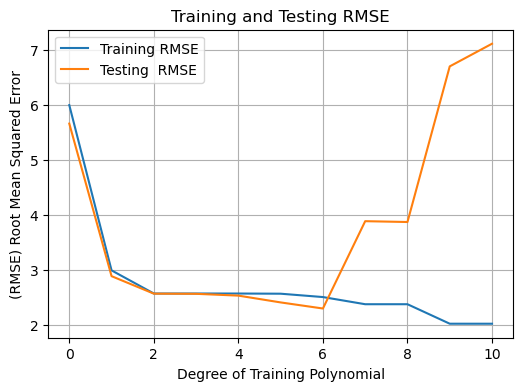

In [17]:
plt.figure(figsize=(6,4))
plt.plot(range(11),train_rmse,label="Training RMSE")
plt.plot(range(11),test_rmse,label="Testing  RMSE")
plt.legend()
plt.title("Training and Testing RMSE")
plt.grid()
plt.xlabel("Degree of Training Polynomial")
plt.ylabel("(RMSE) Root Mean Squared Error")

In [18]:
# Look at the magnitude of some of these coefficients
p1d

poly1d([ 7.14791965e-02, -5.15477766e+00,  1.20913474e+02, -1.45880694e+03,
        1.05928997e+04, -4.95344986e+04,  1.52919519e+05, -3.09890160e+05,
        3.96220903e+05, -2.89469939e+05,  9.19951187e+04])

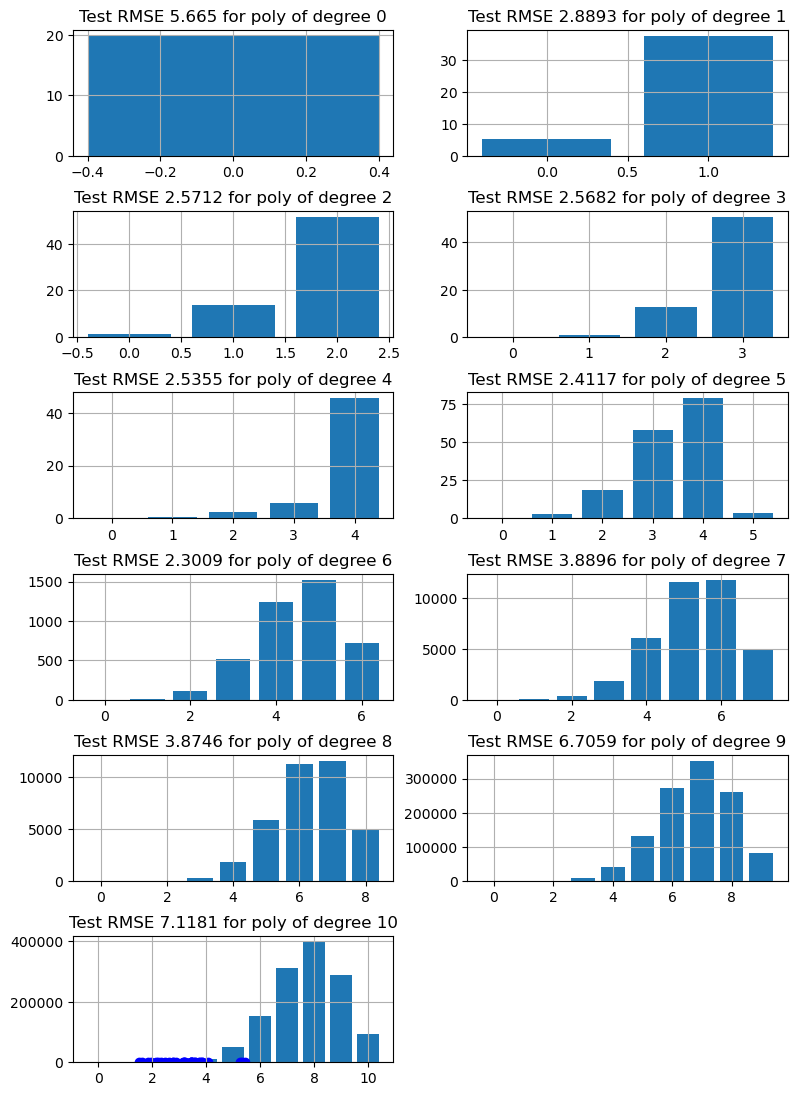

In [42]:
# Create some polynomial regression models and plot them
plt.figure(figsize=(8,18))
for ii in range(0,11):
    p1d = np.poly1d(np.polyfit(X_train, y_train, ii))
    xp = X_train.copy()
    xp.values.sort()
    train_rmse.append(round(mean_squared_error(y_train,p1d(X_train))**0.5,4))
    test_rmse.append(round(mean_squared_error(y_test,p1d(X_test))**0.5,4))
    
    plt.subplot(10,2,ii+1)
    plt.bar(range(0,(len(p1d)+1)),np.abs(p1d))
    plt.grid()
    plt.title(f'Test RMSE %s for poly of degree %s' % (test_rmse[-1],ii))

plt.scatter(X,y,c="blue")
plt.tight_layout(h_pad=.8,pad=.8)

Why do the coefficients get bigger ? Better yet, what can we do about it ? Regularization ! See https://home.cs.colorado.edu/~ketelsen/files/courses/csci4622/slides/lesson03.pdf More on that in a minute. 

## Mitigating Over-fitting and Under-fitting

See [this page](https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/)

Reducing Overfitting:

1. Increase the amount of training data.
2. Reduce model complexity by eliminating features
3. Ridge Regularization and Lasso Regularization
4. Use dropout for neural networks 

Reducing Underfitting:

1. Increase model complexity
2. Increase number of features, performing feature engineering
3. Remove noise from the data
4. Increase the number of epochs if using Neural Nets

See the [Wikipedia page](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff) for Bias Variance Tradeoff

Increasing the size of the training set reduces variance. This makes sense. If you have a small set you might be training on outliers or data that is generally unprepresentative of the larger data set. 

Adding features into the model will decrease the bias but might also cause higher variance since you might be making the method more specific to the training data. 

It's possible to reduce dimensionality and/or choose a subset of all features which can result in a high bias model with lower variance. You are basically saying you want or think that the model should be more simple.

Learning algorithms typically have some tunable parameters that control bias.
Decision trees are commonly pruned to control variance.

One way of resolving the trade-off is to use mixture models and ensemble learning. For example, boosting combines many "weak" (high bias) models in an ensemble that has lower bias than the individual models, while bagging combines "strong" learners in a way that reduces their variance.

Model validation methods such as cross-validation (statistics) can be used to tune models so as to optimize the trade-off. 

## Summary

What have we learned ? Well lots of things but they all boil down to some very basic concepts. 

### Data Always Has Noise in It. 

There is no such thing as pure data. There are always accidents and/or errors. Even if someone tells you about them ("Oh, the person who entered the data was a temp employee") it doesn't necessarily help you identify where the errors were made. Also consider that instruments have problems all the time which might cause random errors or distortions of measurements. Even if the staff operating the equipment are very well-trained, they might not catch these problems.

### Data Scientists Do Not Like Noisy Data

Everyone wants clean and perfect data. How many projects begin with a major analysis of missing values as well as merging different data sets which might have been collected by different people at different locations at different times under different regulations? This is more common than not. Unless you are dealing with example data, be prepared to do lots of transforming and cleanup. There is no way around this.

### Determine if the data of interest follows a known distrubtion

If your data inputs and outputs can be shown to follow a known distribution then you are in luck because then you can use all the known caharacteristics of the distribution to help you. You might not even need to build a model but if you do then you have more confidence in the assumptions you make about your data

### Bias vs Variance

"Low Bias" means that your model is "closer" to the "truth" (the observed data). "Low bias" does not mean better because your model training might have also modeled the data and any noise that it contains. This can lead to over training of a model. 
A "High Bias" model means that it deviates from the observed data based on some assumptions that have been made perhaps for the sake of simplicity. As an example, if we want to predict the MPG of an automobile from the above data we could just estimate the MPG of another car by using the average MPG from the data set. We would then be assuming that the cars are all more or less related in some way that could justify this decision. The more assimptions we make the more biased the model becomes.


A "Low Bias" model generally leads to higher variance when applied to unseen data. This is because the model is so well trained on the first data set that any new data that doesn't follow the same pattern might be poorly modeled and thus not generalize well. If we have a "High Bias" model (like taking the average value of the predicted variable) then the variance on unseen data is generally not high because we more or less know what the assumptions behdind the prediction are. 

## Regularization

Here we look at a brief example of how to "tame" large coefficients such as those we saw with the poynomial regression. On the other hand, we can also use regularization to improve upon a linear model. the way to consider how regularization is as follows. We start with a typical regression equation

<img src="pics/reg1.png">

Estimates of the betas are found by minimizing:

<img src="pics/reg2.png">

Regularization works by attaching a penalty quantity that will contribute to the total quanitity being penalized. 

<img src="pics/reg3.png">

So if the multiplier is 0 then the equation reduces to a normal Linear Regression. If the multiplier is non-zero then the sum of the betas squared add to what is being minimized which in turn will reduce the size of the coefficients. If the penalty quantity is "too high" then we will have over-training albeit with small coefficients. Let's look at an example: 


In [43]:
# Read in some data
url = "https://raw.githubusercontent.com/steviep42/bios_534/master/data/mtcars.csv"
mtcars = pd.read_csv(url)

mtvals = mtcars.values

y = mtvals[:,0]         # Gets the mpg column
X = mtvals[:,1:10]      # Gets everything BUT the mpg column

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# define the model
lm_model = LinearRegression()
lm_model.fit(X_train,y_train)
lm_preds = lm_model.predict(X_test)
test_rmse = round(mean_squared_error(y_test,lm_preds)**0.5,4)
print("Linear Model RMSE: ",test_rmse)

Linear Model RMSE:  3.676


Not terrible but if we use a Python function that implements regularization perhaps we can improve upon this. We'll set the alpha value to be 1 which allows the penalty to be applied to the overall sum which is being minimized. We notice an improvement. But then it becomes an exercise in determining how best to set alpha without overtraining the model. 

In [44]:
# define the model 
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train,y_train)
ridge_preds = ridge_model.predict(X_test)
test_rmse = round(mean_squared_error(y_test,ridge_preds)**0.5,4)
print("Ridge Model RMSE: ",test_rmse)

Ridge Model RMSE:  3.2937


Let's write a function to try out the Ridge function with different values of alpha. We'll plot the resulting RMSE and try to figure out the best value of alpha.

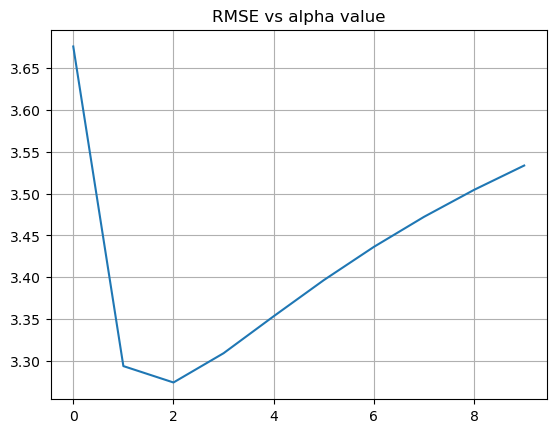

In [45]:
def ridger(alpha=1):
    rmse = []
    from sklearn.linear_model import Ridge
    model = Ridge(alpha=alpha)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    rmse = round(mean_squared_error(y_test,preds)**0.5,4)
    coefs = model.coef_
    return(rmse,coefs)

forplot =  [ridger(alpha=i) for i in np.arange(0,10,1)]
rmses = [item[0] for item in forplot]
plt.plot(rmses)
plt.title("RMSE vs alpha value")
plt.grid()

It doesn't take long to figure out that an alpha around 2.0 will yield the lowest RMSE which winds up being lower than our original RMSE observed with an alpha of 1. 

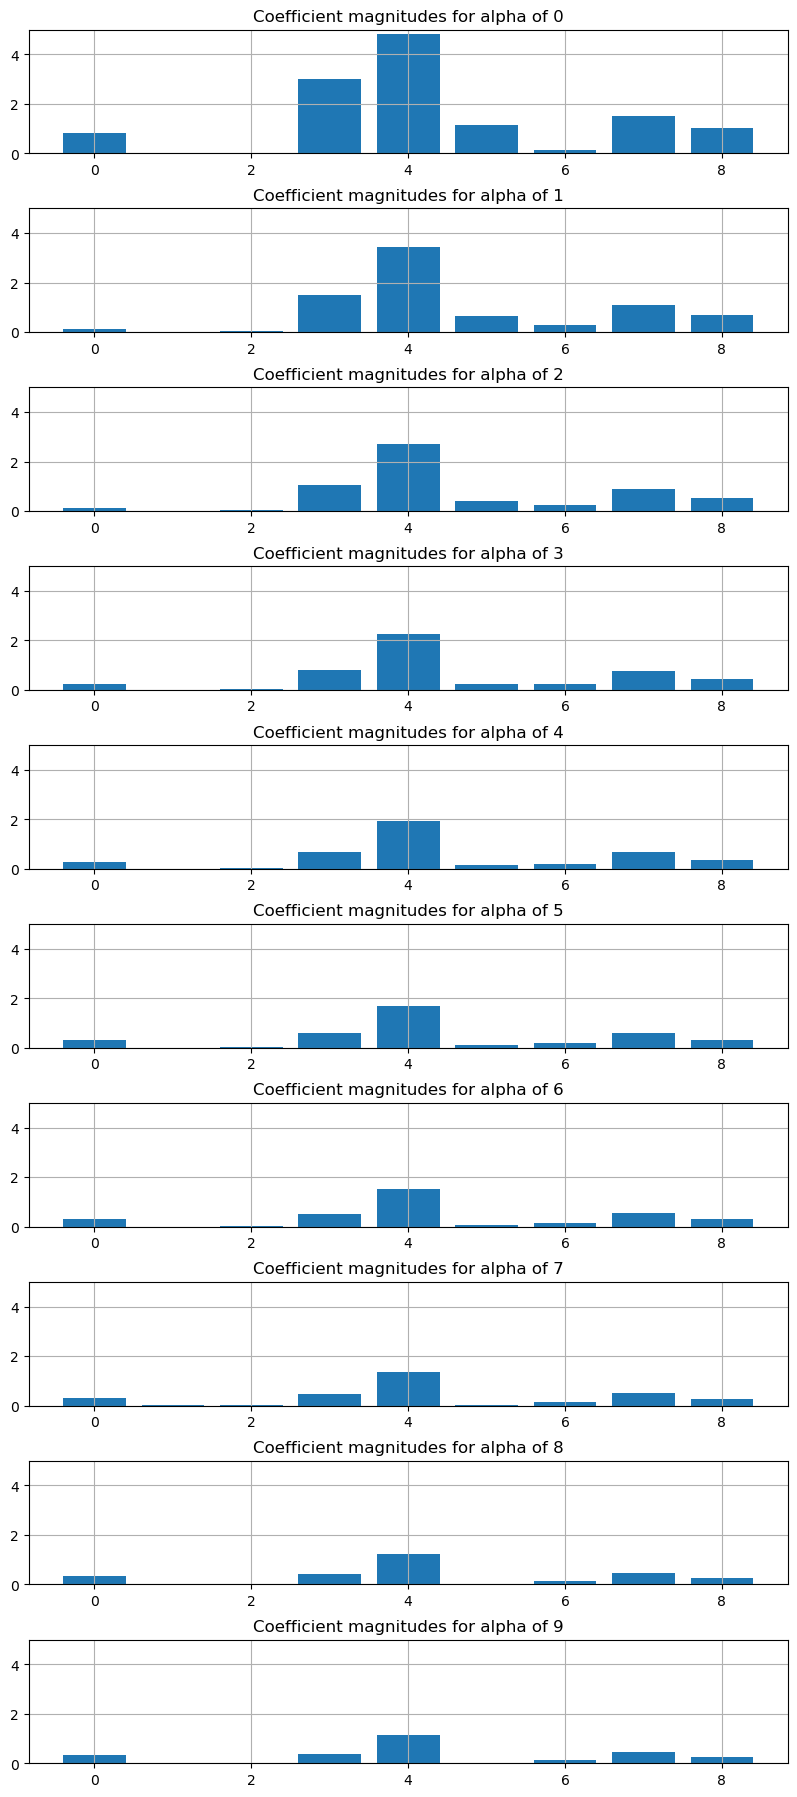

In [28]:
lst3 = [item[1] for item in forplot]
plt.figure(figsize=(8,18))
for ii in range(0,len(lst3)):
      
    plt.subplot(10,1,ii+1)
    plt.bar(range(0,len(lst3[ii])),np.abs(lst3[ii]))
    plt.ylim((0,5))
    plt.grid()
    plt.title('Coefficient magnitudes for alpha of %d' % ii)

#plt.scatter(X,y,c="blue")
plt.tight_layout(h_pad=.8,pad=.8)

In this case we don't have to look far to figure this out. We could do a Grid Search on this but looks like we have done a good enough job for now.

## L1 and L2 Regularization

The penlty term will dictate the type of regularization to be implemented. L1 (Lasso) encourages zero coefficients where possible. This results in fewer features in a resulting model which suggests less complexity hence less possibility for overtraining. Think of L1 as a way to "knock out" variables from a resulting model. It can be considered as a form of **feature selection**. 

L2 regularization (Ridge) encourages smaller coefficients for less predictive features while keeping the magnitude of larger coefficients lower than that which we witnessed with polynomial regression. L2 tends to shrink coefficients evenly. It is also useful for features that might be strongly correlated or mutually dependent in some way which might then result in the variance in a resulting coefficinet, L2 helps attentuate such variance.

https://explained.ai/regularization/L1vsL2.html